# Question 1

In [51]:
import pandas as pd
import numpy as np

## Load price data

In [59]:
data = pd.read_excel(
    r"PS1_data.xls", 
    skiprows=2,
    usecols="D:L,N:U",
    index_col=0 
)

## Convert Index Prices to USD

In [53]:
# Extract index prices and exchange rates 
index_p = data.iloc[:,0:8]   
exchange_r = data.iloc[:,8:16] 

print(index_p.columns) 
print(exchange_r.columns) 

# Compute real prices
prices = pd.DataFrame(
    index_p.values * exchange_r.values,
    index=index_p.index,
    columns=index_prices.columns
)
prices

Index(['TSX', 'CAC', 'DAX', 'Eurostoxx50', 'NIKKEI225', 'FTSE100', 'SP500',
       'IBOVESPA'],
      dtype='object')
Index(['CAD', 'EUR', 'EUR.1', 'EUR.2', 'JPY', 'GBP', 'USD', 'BRL'], dtype='object')


,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA
date,,,,,,,,
03/30/2007,11405.614953,7526.663284,9240.446256,5585.429328,146.737577,12316.523195,1420.86,22289.537490
04/02/2007,11473.616783,7548.147672,9275.037809,5601.453227,144.605259,12493.381446,1424.55,22313.211129
04/03/2007,11532.693226,7611.108859,9388.194687,5658.185998,145.074199,12562.875108,1437.77,22758.235808
04/04/2007,11606.366871,7675.345922,9460.640369,5699.767284,147.721236,12579.205809,1439.37,22947.677004
04/05/2007,11664.781125,7711.827200,9536.606421,5737.536852,147.365213,12612.304631,1443.76,23008.306221
...,...,...,...,...,...,...,...,...
12/21/2021,16175.701299,7854.781666,17420.881840,4708.353586,250.897755,9639.878610,4649.23,18375.673500
12/22/2021,16304.338059,7959.621786,17601.238109,4760.036061,250.547714,9742.118520,4696.56,18322.454180
12/23/2021,16511.211494,8050.471950,17850.134036,4832.741448,252.360109,9844.905688,4725.79,18554.903227


## Daily log returns

In [54]:
# r_t = ln(P_t / P_t-1)

log_returns = np.log(prices / prices.shift(1))
log_returns = log_returns.dropna()
log_returns

,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA
date,,,,,,,,
04/02/2007,0.005944,0.002850,0.003737,0.002865,-0.014638,0.014257,0.002594,0.001062
04/03/2007,0.005136,0.008307,0.012126,0.010077,0.003238,0.005547,0.009237,0.019748
04/04/2007,0.006368,0.008404,0.007687,0.007322,0.018082,0.001299,0.001112,0.008290
04/05/2007,0.005020,0.004742,0.007998,0.006605,-0.002413,0.002628,0.003045,0.002639
04/10/2007,0.003777,0.004326,0.009359,0.006982,0.006290,0.003346,0.003202,0.011431
...,...,...,...,...,...,...,...,...
12/21/2021,0.015750,0.016735,0.016559,0.019405,0.019291,0.012242,0.017622,-0.003873
12/22/2021,0.007921,0.013259,0.010300,0.010917,-0.001396,0.010550,0.010129,-0.002900
12/23/2021,0.012608,0.011349,0.014042,0.015159,0.007208,0.010496,0.006204,0.012607


## Summary statistics

In [55]:
mean_r = log_returns.mean()
std_r = log_returns.std()
skew = log_returns.skew()
kurt = log_returns.kurtosis()
autocorr = log_returns.apply(lambda x: x.autocorr(lag=1))

# Combine into DataFrame
summary_stats = pd.DataFrame({
    "Mean": mean_r,
    "Std Dev": std_r,
    "Skewness": skew,
    "Kurtosis": kurt,
    "Autocorrelation_lag1":autocorr
})

summary_stats

,Mean,Std Dev,Skewness,Kurtosis,Autocorrelation_lag1
TSX,0.000117,0.015251,-0.866287,12.306159,0.007233
CAC,0.000025,0.018352,0.372231,17.583211,-0.075810
DAX,0.000207,0.018058,0.410990,16.916223,-0.058452
Eurostoxx50,-0.000041,0.018481,0.283744,16.980611,-0.077204
NIKKEI225,0.000165,0.016163,-0.552431,16.738605,-0.199259
FTSE100,-0.000065,0.015374,-0.274447,10.097418,-0.019601
SP500,0.000374,0.013581,-0.637743,12.021852,-0.154566
IBOVESPA,-0.000060,0.024794,-0.154794,11.078068,0.012955


In [56]:
# Autocorrelation_extended

autocorr_lags = pd.DataFrame(
    {
        f"Lag_{k}": log_returns.apply(lambda x: x.autocorr(lag=k))
        for k in range(1, 11)
    }
)
autocorr_lags

,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10
TSX,0.007233,0.009077,0.013813,0.023826,-0.067686,0.005389,0.069432,-0.015288,-0.020472,-0.000244
CAC,-0.075810,-0.042491,0.020241,0.023716,-0.087937,0.030301,0.005166,0.038833,-0.052589,0.008100
DAX,-0.058452,-0.038718,0.020449,0.020902,-0.072770,0.026618,0.011962,0.033527,-0.045636,0.023689
Eurostoxx50,-0.077204,-0.039758,0.016318,0.027127,-0.080786,0.029420,0.010030,0.035238,-0.043922,0.007640
NIKKEI225,-0.199259,0.017845,-0.015499,0.001450,-0.002828,-0.024639,0.006401,0.006321,-0.021764,-0.014160
FTSE100,-0.019601,-0.034437,-0.031450,0.049808,-0.077769,-0.014723,0.046608,0.004294,-0.004214,-0.001546
SP500,-0.154566,0.039457,-0.030258,0.017885,-0.040442,-0.036437,0.067727,0.016850,-0.010450,0.010288
IBOVESPA,0.012955,0.001100,-0.032136,0.015959,-0.011408,-0.027906,0.047619,-0.002601,0.022026,0.022751


The autocorrelation coefficients of daily returns up to lag ten are generally small and fluctuate around zero for all indices, indicating little serial dependence.

## Correlation matrix

In [57]:
correlation_matrix = log_returns.corr()
correlation_matrix


,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA
TSX,1.000000,0.677227,0.659697,0.661918,0.222340,0.716389,0.771410,0.685627
CAC,0.677227,1.000000,0.950523,0.984838,0.260700,0.841713,0.612419,0.567331
DAX,0.659697,0.950523,1.000000,0.966589,0.246152,0.809851,0.615929,0.540996
Eurostoxx50,0.661918,0.984838,0.966589,1.000000,0.248228,0.830241,0.611192,0.553301
NIKKEI225,0.222340,0.260700,0.246152,0.248228,1.000000,0.343642,0.099309,0.238317
FTSE100,0.716389,0.841713,0.809851,0.830241,0.343642,1.000000,0.616687,0.617852
SP500,0.771410,0.612419,0.615929,0.611192,0.099309,0.616687,1.000000,0.610080
IBOVESPA,0.685627,0.567331,0.540996,0.553301,0.238317,0.617852,0.610080,1.000000


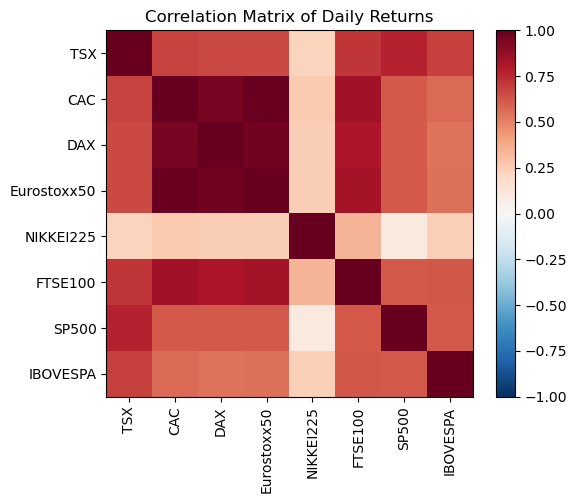

In [58]:
# Plot heatmap of correlation matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.imshow(correlation_matrix, cmap="RdBu_r", vmin=-1, vmax=1)
plt.colorbar()

plt.xticks(
    range(len(correlation_matrix.columns)),
    correlation_matrix.columns,
    rotation=90
)
plt.yticks(
    range(len(correlation_matrix.columns)),
    correlation_matrix.columns
)

plt.title("Correlation Matrix of Daily Returns")
plt.tight_layout()
plt.show()


Daily equity returns can be treated as approximately i.i.d. in time, but the Gaussian assumption is not appropriate. Autocorrelations from lag 1 to 10 are generally close to zero, indicating limited serial dependence. In contrast, returns exhibit negative skewness and pronounced excess kurtosis, implying substantial departures from normality. The correlation matrix shows strong cross-market co-movement—especially among European indices—highlighting the importance of accounting for contemporaneous dependence across assets.